In [1]:
import sys
sys.path.append("..") # This is for the imports from adjacent folders to work

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

# from main_functions.DCv5_multiple_XY4 import get_circuit
from main_functions.gen_dynamic_circuit_v5 import get_circuit as get_v0
from main_functions.DCv5_stretched import get_circuit as get_v1_stretch
from main_functions.DCv5_stretched_XY4 import get_circuit as get_v2_stretch
from main_functions.DCv5_meas_stretched import get_circuit as get_v3_stretch
from main_functions.DCv5_doubly_stretched import get_circuit as get_v4_stretch
from main_functions.DCv5_parallel_doubly_stretched import get_circuit as get_v5_stretch
from main_functions.DCv5_multiple_XY4 import get_circuit as get_v6_stretch
from main_functions.DCv5_everything_DD import get_circuit as get_v7_stretch

from qiskit_ibm_runtime.fake_provider import FakeMarrakesh, FakeTorino, FakeSherbrooke, FakeFez
from qiskit_aer import AerSimulator
from qiskit import generate_preset_pass_manager
from qiskit.circuit import IfElseOp
from qiskit_ibm_runtime import SamplerOptions, Batch, Session, SamplerV2
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
import math
import json

QiskitRuntimeService.save_account( 
 token="ryeQLJCCBlp2Y1CK7B0KvXRUvVDG7Xbkhu8H2L9MXUsU", 
 channel="ibm_cloud",
 instance='crn:v1:bluemix:public:quantum-computing:us-east:a/5fef03c739244d07801bbb0cd3b5d388:4854b5b3-784b-48cc-8949-0fe8c86aa28b::', 
 name="quantum_credits",
 overwrite=True
 #set_as_default=True
 )
service = QiskitRuntimeService(name="quantum_credits")

from utils.isa_cdr import get_populations
from utils.generate_complementary_colors import generate_complementary_colors

c:\Users\Benjamin\iCloudDrive\PhD\Projects\Efficient modeling of dissipative dynamics using quantum circuits\GitHub repository\31_10_diss_dynamics\test\..\main_functions\DCv5_everything_DD.py:20: SyntaxWarning: invalid escape sequence '\o'
  """


In [2]:
num_emitters = 10
omega_m = [1.2]*num_emitters
omega_c = 1.1
gamma = [0.8*10**(-6)]*num_emitters
kappa = [0.2]
g = [0.03]*(2*(num_emitters-1)) 
#t = 200*(np.linspace(0, 1, 1)**1.5)
t = [50]
#initial_state = ['1', '3']
initial_state = ['1', '3','6','7','8']

r = 1
noisy_backend = service.backend("ibm_kingston")
optimization_level = 2
shots = 4*0.5*(10**4)
options = {
    "default_shots": shots,
    "twirling": {
        "enable_gates": True,
        "enable_measure": False,
        "num_randomizations": "auto",
        "shots_per_randomization": "auto"
    }
}

# options = {"default_shots": shots}

In [3]:
qc, init_layout = get_v7_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
pm = generate_preset_pass_manager(optimization_level, target=noisy_backend.target, initial_layout = init_layout, routing_method = 'none')
isa_qc = pm.run(qc)
pubs = [(isa_qc, x) for x in t]

# qc.draw('mpl', fold = 80)

w_eff: [1.2045, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045000000000001, 1.2045]
g_eff: [0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045, 0.0045]
gamma_eff: [0.009000800000000012, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.00900080000000001, 0.009000800000000012]
gamma_cross: [0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011, 0.009000000000000011]


In [4]:
batch = Batch(backend = noisy_backend, max_time = '10m')
sampler = SamplerV2(mode = batch, options = options)

main_job_ids = []
for idx, instant in enumerate(t):
    main_job = sampler.run([pubs[idx]])
    main_job_ids.append(main_job.job_id())
    print(f'Main job {idx}/{len(t) - 1} submitted with id: {main_job.job_id()}')

batch.close()

with open("multiple_XY4_test_main_job_ids.json", "w") as f:
    json.dump(main_job_ids, f)

Main job 0/0 submitted with id: d3l5v4o3qtks738c2cn0


In [3]:
with open("submitted_ibm_kingston_5_emitters_main_job_ids.json", "r") as f:
    regular_job_ids = json.load(f)
with open("stretch_test_main_job_ids.json", "r") as f:
    stretch_job_ids = json.load(f)
with open("stretch_XY4_test_main_job_ids.json", "r") as f:
    stretch_XY4_job_ids = json.load(f)
with open("meas_stretch_XY4_test_main_job_ids.json", "r") as f:
    meas_stretch_XY4_job_ids = json.load(f)
with open("doubly_stretch_XY4_test_main_job_ids.json", "r") as f:
    doubly_stretch_XY4_job_ids = json.load(f)
with open("parallel_doubly_stretch_XY4_test_main_job_ids.json", "r") as f:
    parallel_doubly_stretch_XY4_job_ids = json.load(f)
with open("multiple_XY4_test_main_job_ids.json", "r") as f:
    multiple_XY4_job_ids = json.load(f)

regular_job_ids = [regular_job_ids[0]]

regular_data = { str(i) : [] for i in range(num_emitters) }
stretched_data = { str(i) : [] for i in range(num_emitters) }
stretch_XY4_data = { str(i) : [] for i in range(num_emitters) }
meas_stretch_XY4_data = { str(i) : [] for i in range(num_emitters) }
doubly_stretch_XY4_data = { str(i) : [] for i in range(num_emitters) }
parallel_doubly_stretch_XY4_data = { str(i) : [] for i in range(num_emitters) }
multiple_XY4_data = { str(i) : [] for i in range(num_emitters) }
for (reg_job, str_job, xy4_job, meas_xy4_job, doub_xy4_job, par_xy4_job, mult_xy4_job) in zip(regular_job_ids, stretch_job_ids, stretch_XY4_job_ids, meas_stretch_XY4_job_ids, doubly_stretch_XY4_job_ids, parallel_doubly_stretch_XY4_job_ids, multiple_XY4_job_ids):
    job = service.job(reg_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in regular_data.keys():
        regular_data[key].append(evs[key])
    
    job = service.job(str_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in stretched_data.keys():
        stretched_data[key].append(evs[key])
    
    job = service.job(xy4_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in stretch_XY4_data.keys():
        stretch_XY4_data[key].append(evs[key])

    job = service.job(meas_xy4_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in meas_stretch_XY4_data.keys():
        meas_stretch_XY4_data[key].append(evs[key])
    
    job = service.job(doub_xy4_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in doubly_stretch_XY4_data.keys():
        doubly_stretch_XY4_data[key].append(evs[key])

    job = service.job(par_xy4_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in parallel_doubly_stretch_XY4_data.keys():
        parallel_doubly_stretch_XY4_data[key].append(evs[key])

    job = service.job(mult_xy4_job)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    for key in multiple_XY4_data.keys():
        multiple_XY4_data[key].append(evs[key])

FileNotFoundError: [Errno 2] No such file or directory: 'submitted_ibm_kingston_5_emitters_main_job_ids.json'

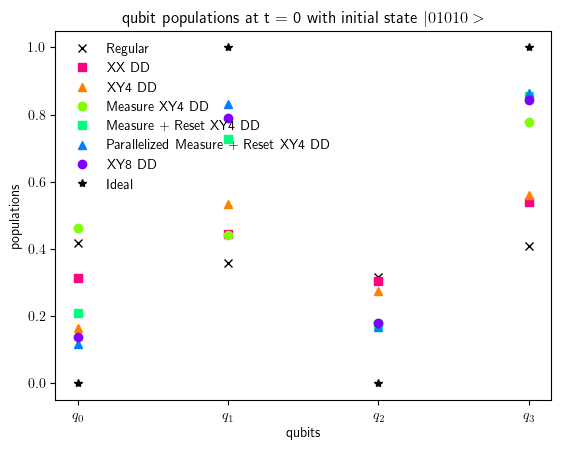

In [ ]:
colors = generate_complementary_colors(6, 'neon', 'hotpink')
ideal_populations = [0]*num_emitters
for qbit in initial_state:
    ideal_populations[int(qbit)] = 1
for (idx, qubit) in enumerate(regular_data.keys()):
    plt.plot(qubit, regular_data[qubit], color = 'black', linestyle = 'none', marker = 'x')
    plt.plot(qubit, stretched_data[qubit], color = colors[0], linestyle = 'none', marker = 's' )
    plt.plot(qubit, stretch_XY4_data[qubit], color = colors[1], linestyle = 'none', marker = '^' )
    plt.plot(qubit, meas_stretch_XY4_data[qubit], color = colors[2], linestyle = 'none', marker = 'o' )
    plt.plot(qubit, doubly_stretch_XY4_data[qubit], color = colors[3], linestyle = 'none', marker = 's' )
    plt.plot(qubit, parallel_doubly_stretch_XY4_data[qubit], color = colors[4], linestyle = 'none', marker = '^' )
    plt.plot(qubit, multiple_XY4_data[qubit], color = colors[5], linestyle = 'none', marker = 'o' )
    plt.plot(qubit, ideal_populations[int(qubit)], color = 'black', linestyle = 'none', marker = '*' )

plt.plot(np.nan, np.nan, color = 'black', linestyle = 'none', marker = 'x', label = 'Regular')
plt.plot(np.nan, np.nan, color = colors[0], linestyle = 'none', marker = 's', label = 'XX DD')
plt.plot(np.nan, np.nan, color = colors[1], linestyle = 'none', marker = '^', label = 'XY4 DD')
plt.plot(np.nan, np.nan, color = colors[2], linestyle = 'none', marker = 'o', label = 'Measure XY4 DD')
plt.plot(np.nan, np.nan, color = colors[3], linestyle = 'none', marker = 's', label = 'Measure + Reset XY4 DD')
plt.plot(np.nan, np.nan, color = colors[4], linestyle = 'none', marker = '^', label = 'Parallelized Measure + Reset XY4 DD')
plt.plot(np.nan, np.nan, color = colors[5], linestyle = 'none', marker = 'o', label = 'XY8 DD')
plt.plot(np.nan, np.nan, color = 'black', linestyle = 'none', marker = '*', label = 'Ideal')
plt.xticks([x for x in range(num_emitters)], labels = [f'$q_{i}$' for i in range(num_emitters)])
plt.xlabel('qubits')
plt.ylabel('populations')
plt.legend(frameon = False)
plt.title('qubit populations at t = 0 with initial state $|01010>$')
plt.savefig('dd_with_stretch_fifth_test', bbox_inches = 'tight')
plt.show()

In [6]:
qc_v0, init_layout = get_v0(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v1, init_layout = get_v1_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v2, init_layout = get_v2_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v3, init_layout = get_v3_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v4, init_layout = get_v4_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v5, init_layout = get_v5_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v6, init_layout = get_v6_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qc_v7, init_layout = get_v7_stretch(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)
qcs = [qc_v0, qc_v1, qc_v2, qc_v3, qc_v4, qc_v5, qc_v6, qc_v7]

pm = generate_preset_pass_manager(optimization_level, target=noisy_backend.target, initial_layout = init_layout, routing_method = 'none')
isa_qcs = [ pm.run(x) for x in qcs ]

batch = Batch(backend = noisy_backend, max_time = '10m')
sampler = SamplerV2(mode = batch, options = options)

job_ids = []
for (idx, q) in enumerate(isa_qcs):
    pub = [(q, t[0])]
    job = sampler.run(pub)
    job_ids.append(job.job_id())
    print(f'Job {idx}/{len(isa_qcs) - 1} submitted with id: {job.job_id()}')

batch.close()

with open("10_emitters_second_stretch_test_job_ids.json", "w") as f:
    json.dump(job_ids, f)

Job 0/7 submitted with id: d3svqq4v6o9s73csci2g
Job 1/7 submitted with id: d3svqq4v6o9s73csci30
Job 2/7 submitted with id: d3svqqc60rgc73aane3g
Job 3/7 submitted with id: d3svqqcv6o9s73csci40
Job 4/7 submitted with id: d3svqqhsg33c73ddrlag
Job 5/7 submitted with id: d3svqqkv6o9s73csci4g
Job 6/7 submitted with id: d3svqqs60rgc73aane50
Job 7/7 submitted with id: d3svqqs60rgc73aane5g


In [5]:
with open("../datasets/10_emitters_second_stretch_test_job_ids.json", "r") as f:
    job_ids = json.load(f)

data = { f'v{i}' : 0 for i in range(0, 8, 1)}
counter = 0
for (j_i) in job_ids:
    job = service.job(j_i)
    result = job.result()
    evs, std = get_populations(num_emitters, result)
    data[f'v{counter}'] = evs
    counter = counter + 1

c:\Users\Benjamin\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit\qpy\interface.py:305: UserWarning: The qiskit version used to generate the provided QPY file, 2.2.1, is newer than the current qiskit version 2.0.0. This may result in an error if the QPY file uses instructions not present in this current qiskit version
  warnings.warn(


In [7]:
qc_v0, init_layout = get_v0(num_emitters, omega_m, omega_c, g, gamma, kappa, initial_state, r, noisy_backend)

pm = generate_preset_pass_manager(optimization_level, target=noisy_backend.target, initial_layout = init_layout, routing_method = 'none')
isa_qc_v0 = pm.run(qc_v0)

exact_sampler = SamplerV2(mode = AerSimulator(), options = options)
job = exact_sampler.run([(isa_qc_v0, t[0])])
result = job.result()
ideal_populations, std = get_populations(num_emitters, result)

c:\Users\Benjamin\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\fake_provider\local_service.py:269: UserWarning: Options {'twirling': {'enable_gates': True, 'enable_measure': False, 'num_randomizations': 'auto', 'shots_per_randomization': 'auto'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


In [9]:
0.009000800000000012*t[0]

0.4500400000000006

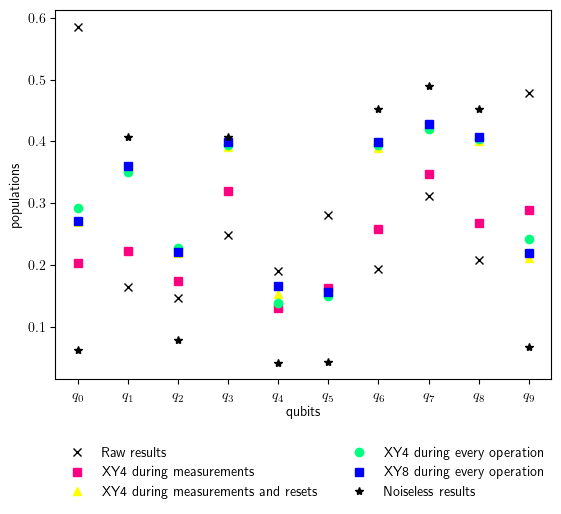

In [10]:
markers = ['x', 's', '^', 'o', 's', '^', 'o', 's']
plot_data = ['v0', 'v3', 'v5', 'v7', 'v6']
colors = ['black'] + generate_complementary_colors(len(plot_data) - 1, 'neon', 'hotpink')

for (idx, key) in enumerate(plot_data):
    for (sub_idx, qubit) in enumerate(data[key].keys()):
        plt.plot(qubit, data[key][qubit], color = colors[idx], linestyle = 'none', marker = markers[idx])

for qubit in ideal_populations.keys():
    plt.plot(qubit, ideal_populations[qubit], color = 'black', linestyle = 'none', marker = '*')

plt.plot(np.nan, np.nan, color = 'black', linestyle = 'none', marker = 'x', label = 'Raw results')
# plt.plot(np.nan, np.nan, color = colors[1], linestyle = 'none', marker = 's', label = 'XX DD')
# plt.plot(np.nan, np.nan, color = colors[2], linestyle = 'none', marker = '^', label = 'XY4 DD')
# plt.plot(np.nan, np.nan, color = colors[3], linestyle = 'none', marker = 'o', label = 'Measure XY4 DD')
# plt.plot(np.nan, np.nan, color = colors[4], linestyle = 'none', marker = 's', label = 'Measure + Reset XY4 DD')
plt.plot(np.nan, np.nan, color = colors[1], linestyle = 'none', marker = 's', label = 'XY4 during measurements')
plt.plot(np.nan, np.nan, color = colors[2], linestyle = 'none', marker = '^', label = 'XY4 during measurements and resets')
plt.plot(np.nan, np.nan, color = colors[3], linestyle = 'none', marker = 'o', label = 'XY4 during every operation')
plt.plot(np.nan, np.nan, color = colors[4], linestyle = 'none', marker = 's', label = 'XY8 during every operation')
plt.plot(np.nan, np.nan, color = 'black', linestyle = 'none', marker = '*', label = 'Noiseless results')
plt.xticks([x for x in range(num_emitters)], labels = [f'$q_{i}$' for i in range(num_emitters)])
plt.xlabel('qubits')
plt.ylabel('populations')
plt.legend(
    loc='upper center',        # position relative to bbox_to_anchor
    bbox_to_anchor=(0.5, -0.15),  # (x, y) position below the axes
    ncol=2,                    # number of legend columns (makes it a line)
    frameon=False              # optional: no box around legend
)
#plt.title(f'qubit populations at $\\tilde{{\\gamma}}$t = {t[0]*0.009000800000000012:.2f} with initial state $\\left| \\psi(0) \\right> = \\left|0101001110 \\right>$')
#plt.savefig('second_stretch_test_different_t', bbox_inches = 'tight')
plt.savefig('../figs/fig_5', bbox_inches = 'tight')
plt.show()

In [ ]:

from qiskit import QuantumCircuit
def accumulated_errors(backend: QiskitRuntimeService.backend, circuit: QuantumCircuit, num_emitters:int) -> list:
    """Compute accumulated gate and readout errors for a given circuit on a specific backend."""

    # Defining useful variables
    properties = backend.properties()
    qubit_layout = list(circuit.layout.initial_layout.get_physical_bits().keys())[:int(num_emitters + np.floor(num_emitters/2))]

    errors = { str(q) : {    'acc_single_qubit_error' : 0,
                                'acc_two_qubit_error' : 0,
                            'single_qubit_gate_count' : 0,
                                'two_qubit_gate_count' : 0,
                                'acc_readout_error' : 0,
                                 'acc_total_error' : 0 }
                            for q in qubit_layout }

    # Define readout error (only for qubits in qubit_layout) using `properties.readout_error`
    for q in qubit_layout:
        errors[str(q)]['acc_readout_error'] += properties.readout_error(q)

    if "ecr" in backend.configuration().basis_gates: 
        two_qubit_gate = "ecr"
    elif "cz" in backend.configuration().basis_gates: 
        two_qubit_gate = "cz"

    for instruction in circuit.data:
        target_qubits = instruction.qubits
        gate_name = instruction.operation.name
        if len(target_qubits) == 1: # Count and add errors for one qubit gates
            target_qubit = circuit.qubits.index(target_qubits[0])
            errors[str(target_qubit)]['single_qubit_gate_count'] += 1
            if gate_name == 'measure':
                errors[str(target_qubit)]['acc_single_qubit_error'] += 0
            elif gate_name == 'delay':
                errors[str(target_qubit)]['acc_single_qubit_error'] += 0
            elif gate_name == 'reset':
                errors[str(target_qubit)]['acc_single_qubit_error'] += 0
            else:
                errors[str(target_qubit)]['acc_single_qubit_error'] += properties.gate_error(gate=gate_name, qubits=target_qubit)
        elif len(target_qubits) == 2: # Count and add errors for two qubit gates
            target_qubit_pair = ( circuit.qubits.index(target_qubits[0]), circuit.qubits.index(target_qubits[1]))
            for q in target_qubit_pair:
                errors[str(q)]['two_qubit_gate_count'] += 1
                errors[str(q)]['acc_two_qubit_error'] += properties.gate_error(gate=two_qubit_gate, qubits=target_qubit_pair)

    for q in qubit_layout:
        errors[str(q)]['acc_total_error'] = errors[str(q)]['acc_single_qubit_error'] + errors[str(q)]['acc_two_qubit_error']+ errors[str(q)]['acc_readout_error']

    return errors, qubit_layout

In [48]:
errors,qubit_layout = accumulated_errors(noisy_backend, isa_qcs[-1], num_emitters)

In [66]:
import pandas as pd
df = pd.DataFrame.from_dict(errors, orient='index')

# Optional: rename columns for prettier display
df = df.rename(columns={
    'acc_single_qubit_error': 'Single qubit error (acc)',
    'acc_two_qubit_error': 'Two qubit error (acc)',
    'single_qubit_gate_count': 'Single-qubit gates',
    'two_qubit_gate_count': 'Two-qubit gates',
    'acc_readout_error': 'Readout error (acc)',
    'acc_total_error': 'Total error (acc)'
})

from IPython.display import display, HTML
import pandas as pd
import dataframe_image as dfi

# Assuming df is your DataFrame from before
styled = (
    df.style
      #.set_caption("Qubit Performance Summary")
      .format(precision=4)
      .background_gradient(subset=["Total error (acc)"], cmap="Reds")  # highlights high total error
      #.bar(subset=["Single-qubit gates", "Two-qubit gates"], color='#5fba7d')
      .set_table_styles(
          [{'selector': 'caption',
            'props': [('color', '#333'), ('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]}]
      )
)

display(styled)
dfi.export(
    styled,
    "qubit_error_table.png",
    table_conversion="matplotlib",   # <- key change
    dpi=300                           # nice and crisp
)

,Single qubit error (acc),Two qubit error (acc),Single-qubit gates,Two-qubit gates,Readout error (acc),Total error (acc)
95,0.0204,0.0153,141,12,0.0084,0.0441
94,0.0082,0.0507,122,38,0.0165,0.0754
79,0.0143,0.0367,142,25,0.0068,0.0579
73,0.0138,0.0558,122,38,0.0187,0.0883
71,0.0084,0.0300,142,25,0.0098,0.0481
58,0.0083,0.0593,121,38,0.0112,0.0789
52,0.0136,0.0289,139,25,0.0082,0.0507
53,0.0059,0.0431,121,38,0.0043,0.0533
33,0.0075,0.0869,143,25,0.0101,0.1045
32,0.0086,0.0788,143,22,0.0101,0.0974
